# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
### **Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Carlos Enríquez Gorgonio A01793102
*   Fernando Ramírez Gómez A01298109
*   Francisco Javier Ramírez Arias A01316379
*   Jessica Lechuga Ramos A01793512
*   Moisés Rangel Silva A00143704

Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados al inicio del curso. 

El artículo del 2016 de Moro, Rita & Vala relacionado al presente problema lo encuentras aquí: https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104  
 
Y el conjunto de datos utilizado es el de la siguiente liga de la UCI: https://archive.ics.uci.edu/ml/datasets/Facebook+metrics 


El archivo se llama dataset_Facebook.csv y contiene 500 registros y 19 columnas.  El objetivo es determinar el impacto generado por un anuncio de una marca de cosméticos en  Facebook, en el cual se intentaron varias variantes en la manera de mostrar el anuncio. Siguiendo el  artículo, deberás considerar como predictores o variables de entrada aquellas que se indican en la Tabla 3. Por otro lado, en la Tabla 2, los autores consideran varios casos para la variable de salida, intentando  determinar cuál puede ser el mejor caso para medir el éxito de la campaña. Para este ejercicio deberás  considerar únicamente los siguientes tres casos como variable de salida: “Lifetime post consumers”,  “Lifetime People who have liked a Page and engaged with a post” y “Likes”.

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

### DATA
El data set, con 500 resgistros, es una muestra de los datos recopilados entre enero 1 y diciembre 31 de 2014. Contiene 19 columnas, de las cuales 7 features son conocidos antes de la publicación del anuncio (post) y los otros 12 features son usados para evaluar el impacto del post.

Los 12 features consisten en 11 features exportados de la página de Facebook más una columna que computa el total de interacciones (pgae total likes), y contienen las métricas asociadas al desempeño del post, por lo tanto, cualquiera de estos features pueden ser usados como feature de salida para predicción.

Los otros 7 features son considerados de entrada. Estos a su vez fueron limpiados y ajustados, eliminando el 'post id', 'post message', 'permanent link', pues no dan valor al modelo, y asjustando la fecha, 'posted', a tres características: 'Post Month', 'Post Weekday', y 'Post Hour'.

El conjunto de datos se divide en cuatro categorías o tipos de features, según la información que proveen:
* de Identificación: permiten identificar, de manera individual, cada post.
* de Contenido: el contenido textual de cada post.
* de Categorización: features que caracterizan el post.
* de Desempeño: métricas para medir el impacto del post (o el impacto de la página, para el caso de "Page total likes").





### Features
#### Features de Salida
Feature                   | Desciption
--------------------------|---------------------------
Lifetime post total reach | The number of people who saw a page post (unique users).
Lifetime post total impressions | Impressions are the number of times a post from a page is displayed, whether the post is clicked or not. People may see multiple impressions of the same post. For example, someone might see a Page update in News Feed once, and then a second time if a friend shares it.
Lifetime engaged users | The number of people who clicked anywhere in a post (unique users).
Lifetime post consumers | The number of people who clicked anywhere in a post.
Lifetime post consumptions | The number of clicks anywhere in a post.
Lifetime post impressions by people who have liked a page | Total number of impressions just from people who have liked a page.
Lifetime post reach by people who like a page | The number of people who saw a page post because they have liked that page (unique users).
**Lifetime people who have liked a page and engaged with a post** | The number of people who have liked a Page and clicked anywhere in a post (Unique users).
Comments | Number of comments on the publication.
Likes | Number of “Likes” on the publication.
Shares | Number of times the publication was shared.
Total interactions | The sum of “likes,” “comments,” and “shares” of the post.
<br>

#### Features de Entrada

Feature                   | Desciption
--------------------------|---------------------------
Category | Manual content characterization: action (special offers and contests, product (direct advertisement, explicit brand content), and inspiration non-explicit brand related content).
Page total likes | Number of people who have liked the company's page.
Type | Type of content (Link, Photo, Status, Video).
Post month | Month the post was published (January, February, March, …, December).
Post hour | Hour the post was published (0, 1, 2, 3, 4, …, 23).
Post weekday | Weekday the post was published (Sunday, Monday, …, Saturday).
Paid | If the company paid to Facebook for advertising (yes, no).
<br>


### Librerías

In [1]:
# Módulos, librerías y paquetes requeridos.

import pandas as pd
import numpy as np

import math
import graphviz
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns
import missingno as msno

from IPython.display import Image

from scipy.stats import boxcox

from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, KFold, train_test_split, cross_validate, learning_curve, RepeatedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# **Ejercicio-1.** 

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las 
mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a 
post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables 
que indican los autores en la Tabla 3 del artículo citado. 

In [2]:
# Importación de archivo a DataFrame
df= pd.read_csv('https://raw.githubusercontent.com/KarltonBotics/MNA-IA-Equipos51/main/dataset_Facebook.csv', sep=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
# Sustituye los nombres de las columnas para una mejor interacción.
df.rename(columns = {
    'Page total likes': 'total_likes',
    'Type': 'type',
    'Category': 'category',
    'Post Month': 'post_month',
    'Post Weekday': 'post_weekday',
    'Post Hour': 'post_hour',
    'Paid': 'paid',
    'Lifetime Post Total Reach': 'lptr',
    'Lifetime Post Total Impressions': 'lpti',
    'Lifetime Engaged Users': 'leu',
    'Lifetime Post Consumers': 'lpcm',
    'Lifetime Post Consumptions': 'lpcn',
    'Lifetime Post Impressions by people who have liked your Page': 'lpiplp',
    'Lifetime Post reach by people who like your Page': 'lprplp',
    'Lifetime People who have liked your Page and engaged with your post': 'lpe',
    'comment': 'comment',
    'like': 'like',
    'share': 'share',
    'Total Interactions': 'interactions'
}, inplace = True)
# El inplace true, nos permite hacer la mutación sobre el mismo dataframe, sin necesidad de crear otro nuevo
df.head()

,total_likes,type,category,post_month,post_weekday,post_hour,paid,lptr,lpti,leu,lpcm,lpcn,lpiplp,lprplp,lpe,comment,like,share,interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
# Determinamos las columnas del conjunto de entrada
X = df[['category', 'total_likes', 'type', 'post_month', 'post_weekday', 'post_hour', 'paid']].copy()
print("Columnas X:")
print(X.head())

# Determinamos las columnas del conjunto de salida
y = df[['lpe']].copy()
print("\nColumnas y:")
print(y.head())

Columnas X:
   category  total_likes    type  post_month  post_weekday  post_hour  paid
0         2       139441   Photo          12             4          3   0.0
1         2       139441  Status          12             3         10   0.0
2         3       139441   Photo          12             3          3   0.0
3         2       139441   Photo          12             2         10   1.0
4         2       139441   Photo          12             2          3   0.0

Columnas y:
    lpe
0   119
1  1108
2   132
3  1386
4   396


# **Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para Entrenamiento y 
Validación.  

In [5]:
# Creamos nuestros datos de validación con la función trains_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=10)

print("Tamaño del conjunto de entrada para Entrenamiento y Validación: ", X_train.shape)
print("Tamaño del conjunto de entrada para Prueba: ", X_test.shape)
print("-----")
print("Tamaño del conjunto de salida para Entrenamiento y Validación: ", y_train.shape)
print("Tamaño del conjunto de salida para Prueba: ", y_test.shape)

Tamaño del conjunto de entrada para Entrenamiento y Validación:  (400, 7)
Tamaño del conjunto de entrada para Prueba:  (100, 7)
-----
Tamaño del conjunto de salida para Entrenamiento y Validación:  (400, 1)
Tamaño del conjunto de salida para Prueba:  (100, 1)


In [6]:
X_train.describe()

,category,total_likes,post_month,post_weekday,post_hour,paid
count,400.000000,400.000000,400.000000,400.000000,400.00000,399.000000
mean,1.872500,123039.272500,7.012500,4.122500,7.79750,0.270677
std,0.850324,16200.661431,3.317357,2.024287,4.24931,0.444867
min,1.000000,81370.000000,1.000000,1.000000,1.00000,0.000000
25%,1.000000,111620.000000,4.000000,2.000000,3.00000,0.000000
50%,2.000000,129600.000000,7.000000,4.000000,9.00000,0.000000
75%,3.000000,136393.000000,10.000000,6.000000,11.00000,1.000000
max,3.000000,139441.000000,12.000000,7.000000,20.00000,1.000000


In [7]:
y_train.describe()

,lpe
count,400.000000
mean,604.920000
std,599.561188
min,9.000000
25%,287.000000
50%,408.000000
75%,636.750000
max,4376.000000


# **Ejercicio-3.**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que 
utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el 
error porcentual absoluto medio MAPE. 

In [8]:
# Raíz del error cuadrático medio
def rmse(y, y_hat):
    substraction = (y - y_hat)
    square = np.square(substraction)
    MSE = square.mean()
    RMSE = np.sqrt(MSE)

    return RMSE

In [9]:
# Error absoluto medio
def mae(y, y_hat):
    absolute = np.abs(y - y_hat)
    average = np.mean(absolute)

    return average

In [10]:
# Error absoluto medio porcentual
def mape(y, y_hat):
    absolute = np.abs((y - y_hat) / y)
    average = np.mean(absolute)
    percentage = average * 100

    return percentage

# **Ejercicio-4.**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información. 

In [11]:
# Función que grafica un histograma de acuerdo con los parámetros predefinidos
def plot_hist(df_data):
  # Tamaño de la figura
  sns.set(rc={'figure.figsize':(12,4)})
  len_col = len(df_data.columns)
  # Ventana de 1x3 nichos para incluir en cada uno de ellos un gráfico.
  fig, axes = plt.subplots(1, len_col)
  for k in range(0,len_col):
    plt.subplot(1, len_col, k+1)
    # df_data.columns devuelve una lista con los nombres de las columnas.
    plt.hist(df_data[df_data.columns[k]], bins=20)
    plt.xlabel(df_data.columns[k])
  plt.show()


### Análisis de los Datos

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 305 to 265
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      400 non-null    int64  
 1   total_likes   400 non-null    int64  
 2   type          400 non-null    object 
 3   post_month    400 non-null    int64  
 4   post_weekday  400 non-null    int64  
 5   post_hour     400 non-null    int64  
 6   paid          399 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 25.0+ KB


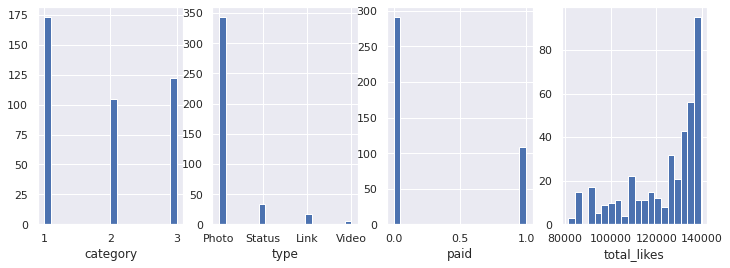

In [13]:
# Histograma de las variables de entrada
plot_hist(X_train[['category', 'type', 'paid', 'total_likes']])

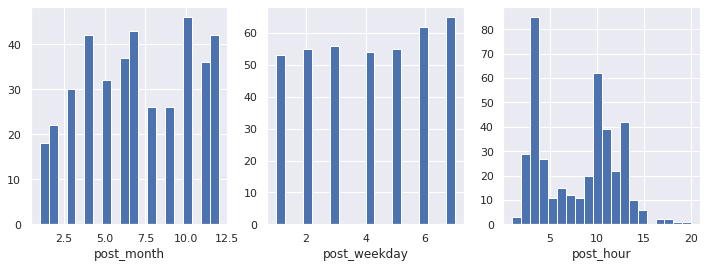

In [14]:
# Histograma de las variables de entrada
plot_hist(X_train[['post_month', 'post_weekday', 'post_hour']])

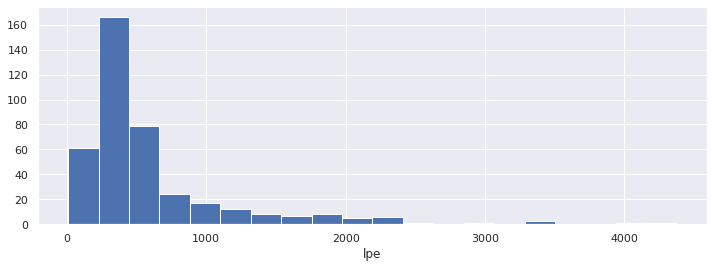

In [15]:
# Histograma de las variables de salida
plot_hist(y_train[['lpe']])

In [16]:
X_train.head()

,category,total_likes,type,post_month,post_weekday,post_hour,paid
305,3,124940,Photo,6,4,2,0.0
107,2,136736,Status,10,1,4,0.0
350,2,116435,Photo,5,5,9,0.0
334,2,119198,Status,5,1,2,0.0
142,2,136013,Status,10,3,2,1.0


In [17]:
# Columnas categóricas: type, category
df_name_cate = ['type', 'category']
# Columnas ordinales o discretas cuantitativas: post_month, post_weekday, post_hour
df_name_ord = ['post_month','post_weekday','post_hour']
# Columnas numéricas o cuantitativas: total_likes
df_name_num = ['total_likes']
# Columnas binarias: paid
df_name_bin = ['paid']

In [18]:
# Muestra de los valores de los datos categóricos
for n in df_name_cate:
  print(n + ": ", X_train[n].unique())

type:  ['Photo' 'Status' 'Link' 'Video']
category:  [3 2 1]


In [19]:
# Muestra de los valores de los datos ordinales
for n in df_name_ord:
  print(n + ": ", X_train[n].unique())

post_month:  [ 6 10  5  7  4 11  2  1 12  8  3  9]
post_weekday:  [4 1 5 3 7 2 6]
post_hour:  [ 2  4  9 11 13  1  8  3 12  6 10  5 17 20 15 14  7 18 19]


In [20]:
# Muestra de los valores de los datos numéricos
for n in df_name_num:
  #print(n + ": ", X_train[n].unique())
  print(n + " min: ", X_train[n].min())
  print(n + " max: ", X_train[n].max())

total_likes min:  81370
total_likes max:  139441


In [21]:
# Muestra de los valores de los datos binarios
for n in df_name_bin:
  print(n + ": ", X_train[n].unique())

paid:  [ 0.  1. nan]


In [22]:
# Búsqueda de los datos nulos en los datos de entrada
X_train.isnull().sum()

category        0
total_likes     0
type            0
post_month      0
post_weekday    0
post_hour       0
paid            1
dtype: int64

In [23]:
# Búsqueda de los datos nan en los datos de entrada
X_train.isna().any()

category        False
total_likes     False
type            False
post_month      False
post_weekday    False
post_hour       False
paid             True
dtype: bool

In [24]:
# Grafica de datos faltantes en los datos de entrada
#msno.matrix(X_train)

In [25]:
# Búsqueda de los datos nulos en los datos de salida
print("'nulos' en los datos de salida:\n ", y_train.isnull().sum())
print("\n")
# Búsqueda de los datos nan en los datos de salida
print("'na' en los datos de salida:\n",y_train.isna().any())

'nulos' en los datos de salida:
  lpe    0
dtype: int64


'na' en los datos de salida:
 lpe    False
dtype: bool


In [26]:
print("y_train min: ", y_train['lpe'].min())
print("y_train max: ", y_train['lpe'].max())

y_train min:  9
y_train max:  4376


In [27]:
X_train.agg(['skew', 'kurtosis'])

,category,total_likes,post_month,post_weekday,post_hour,paid
skew,0.246546,-0.940290,-0.077253,-0.067594,0.107254,1.036168
kurtosis,-1.575156,-0.338469,-1.165671,-1.279791,-1.159563,-0.931048


* La variable de entrada **'total_likes'** tiene una inclinación negativa (los datos están cargados hacia la derecha) moderadamente pronunciada, cercana a -1, por lo que se debe ajustar para que tenga una distribución normalizada, ya que se va a utilizar un modelo de regresión lineal.

* **'total_likes'** es una variable donde se cuenta el acumulado de likes dados en un post, los números pueden crecer fuera de un rango de manera rápida, por lo que se recomienda reescalar las entradas de manera periódica.

* La variable de entrada **'type'** no puede ser agregada por la función *agg* puesto que no es numérica. Esta variable categórica debe ajustarse para ser tratada.

* Hay un dato en blanco en la variable de entrada 'paid' el cual se decide a imputar, utilizando la moda: most frequent.

* La variable de salida **'lpe'** (Lifetime people who have liked a page and engaged with a post) corresponde al *número de gente que le gustó una página y dio clic en cualquier lugar en un post (usuario únicos)*.

### Pre-Procesamiento

In [28]:
# https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/
# https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/
# https://towardsdatascience.com/data-transformation-and-feature-engineering-e3c7dfbb4899

#### total_likes

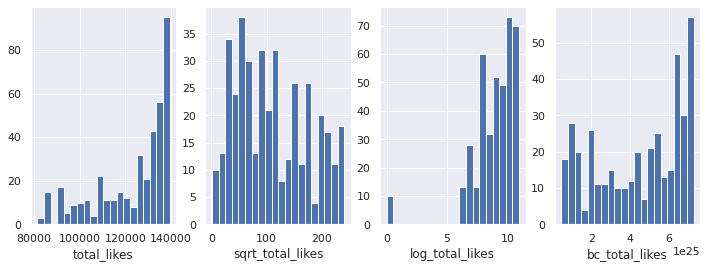

,skew
total_likes,-0.940290
sqrt_total_likes,0.332380
log_total_likes,-2.473810
bc_total_likes,-0.385541


In [29]:
'''
 La variable de entrada 'total_likes', del tipo numérico, muestra un histograma 
 con una inclinación negativa.Se busca transformar sus datos para obtener una 
 distribución cercana a un Gaussiano.
'''
X_tcopy = X_train[['total_likes']].copy()

X_tcopy['sqrt_total_likes'] = np.sqrt(max(X_tcopy.iloc[:, 0]+1) - X_tcopy.iloc[:, 0])
X_tcopy['log_total_likes'] = np.log(max(X_tcopy.iloc[:, 0] + 1) - X_tcopy.iloc[:, 0])
X_tcopy['bc_total_likes'] = boxcox(X_tcopy.iloc[:, 0])[0]

plot_hist(X_tcopy[['total_likes','sqrt_total_likes', 'log_total_likes', 'bc_total_likes']])
X_tcopy.agg(['skew']).transpose()

* Después de aplicar tres opciones de transformación, raíz cudrada, logaritmo y boxcox, la que mejor resultados ofrece en cuanto a la distribución es la raíz cuadrada.

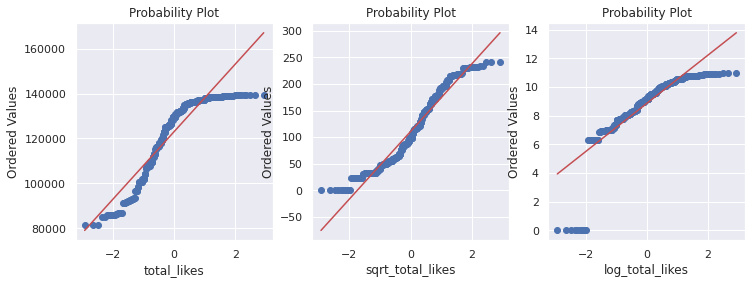

In [30]:
import scipy.stats as stats
import pylab

plt.subplot(1, 3, 1)
stats.probplot(X_tcopy.total_likes,plot=pylab);
plt.xlabel('total_likes')

plt.subplot(1, 3, 2)
stats.probplot(X_tcopy.sqrt_total_likes,plot=pylab);
plt.xlabel('sqrt_total_likes');

plt.subplot(1, 3, 3)
stats.probplot(X_tcopy.log_total_likes,plot=pylab);
plt.xlabel('log_total_likes');

* Con la raíz cuadrada los datos se distribuyen mejor en la diagonal de los cuantiles.



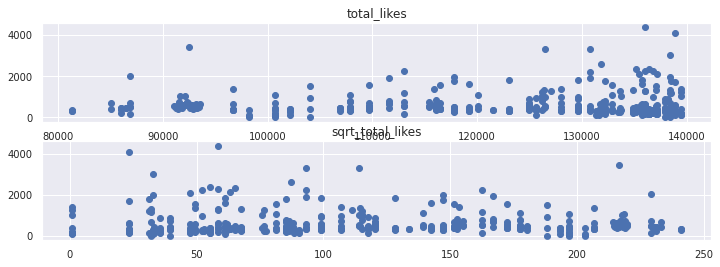

In [31]:
fig, (ax1, ax2) = plt.subplots(2,1)
#plt.title('scatter plot')
ax1.set_title('scatter plot')
ax1.tick_params(labelsize=10)
ax1.set_title('total_likes', fontsize=12)
ax1.set_xlabel('')
ax1.scatter(X_train[['total_likes']], y_train['lpe']);


ax2.tick_params(labelsize=10)
ax2.set_title('sqrt_total_likes', fontsize=12)
ax2.set_xlabel('')
ax2.scatter(X_tcopy[['sqrt_total_likes']], y_train['lpe']);


In [32]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, X_train[['total_likes']], y_train['lpe'], cv=10)

m_log = linear_model.LinearRegression()
scores_sqrt = cross_val_score(m_log, X_tcopy[['sqrt_total_likes']], y_train['lpe'], cv=10)

print("R-squared score without sqrt transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with sqrt transform: %0.5f (+/- %0.5f)" % (scores_sqrt.mean(), scores_sqrt.std() * 2))

R-squared score without sqrt transform: -0.02888 (+/- 0.05276)
R-squared score with sqrt transform: -0.02970 (+/- 0.05895)


#### type

* La variable **'type'** tiene cuatro categorías: 
 * 'Photo' 
 * 'Status' 
 * 'Link' 
 * 'Video'
* Estas categorías deben ser convertidas para que el modelo de regresión lineal las pueda tomar en cuenta.
* Se utiliza el **OneHotEncoder** de la librería *sklearn* para este fin.

In [33]:
# aplicar el encoder
dummy_code_type = pd.get_dummies(X_train['type'], prefix='type')
dummy_code_type.head()

,type_Link,type_Photo,type_Status,type_Video
305,0,1,0,0
107,0,0,1,0
350,0,1,0,0
334,0,0,1,0
142,0,0,1,0


In [34]:
one_hot_enc = OneHotEncoder(handle_unknown='ignore')
one_hot_enc.fit( X_train[['type']] )
one_hot_enc.categories_

[array(['Link', 'Photo', 'Status', 'Video'], dtype=object)]

#### category

* La variable **'category'** tiene tres categorías, marcadas con los números del 1 al 3: 
 * action
 * product
 * inspiration

In [35]:
# aplicar el encoder
dummy_code_cat = pd.get_dummies(X_train['category'], prefix='cat')
dummy_code_cat.head()

,cat_1,cat_2,cat_3
305,0,0,1
107,0,1,0
350,0,1,0
334,0,1,0
142,0,1,0


In [36]:
one_hot_enc = OneHotEncoder(handle_unknown='ignore')
one_hot_enc.fit( X_train[['category']] )
one_hot_enc.categories_

[array([1, 2, 3])]

#### Pipelines

In [37]:
'''
# Columnas categóricas: type, category
  df_name_cate = ['type', 'category']
# Columnas ordinales o discretas cuantitativas: post_month, post_weekday, post_hour
  df_name_ord = ['post_month','post_weekday','post_hour']
# Columnas numéricas o cuantitativas: total_likes
  df_name_num = ['total_likes']
# Columnas binarias: paid
  df_name_bin = ['paid']
'''

"\n# Columnas categóricas: type, category\n  df_name_cate = ['type', 'category']\n# Columnas ordinales o discretas cuantitativas: post_month, post_weekday, post_hour\n  df_name_ord = ['post_month','post_weekday','post_hour']\n# Columnas numéricas o cuantitativas: total_likes\n  df_name_num = ['total_likes']\n# Columnas binarias: paid\n  df_name_bin = ['paid']\n"

In [38]:
def sqrt_neg_skew(data):    
    sqrt_data = np.sqrt (max(data+1) - data)    
    return sqrt_data

In [39]:
cc = sqrt_neg_skew(X_train['total_likes'])
#cc


In [40]:
# Transformación y normalización de los datos númericos
num_pipeline = Pipeline(steps = [('impPromedio', SimpleImputer(strategy='mean')),
                                 #('log', FunctionTransformer(np.log)),
                                 ('sqrt_neg_skew', FunctionTransformer(sqrt_neg_skew)),
                                 ('scalar', MinMaxScaler(feature_range=(0,1)))
                                 ])

In [41]:
# Transformaciones a factores categóricos de entrada
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])

# adicional, para las categóricas (category y type), oneHotEncoder:
catOHE_pipeline = Pipeline(steps = [
    ('impModa', SimpleImputer(strategy='most_frequent')),
    ('OneHotE', OneHotEncoder(drop='first'))])


In [42]:
# Transformación y normalización de los datos ordinales
ord_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                 #('log', FunctionTransformer(np.log)),
                                 ('scalar', MinMaxScaler(feature_range=(0,1)))])

In [43]:
# Conjuntamos las transformaciones numéricas, binarios, categóricas y ordinales que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [
                                                        ('numpipe', num_pipeline, df_name_num),
                                                        ('catohecat', catOHE_pipeline, df_name_cate),
                                                        ('catohebin', catImp_pipeline, df_name_bin),
                                                        ('ordpipe', ord_pipeline, df_name_ord),
                                                    ])

# **Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para  entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y  validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la  actividad. Consulta su documentación correspondiente: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [280]:
# transformacion de los datos de entrada

# total_likes:
X_train_copy = X_train.copy()
X_train_copy['total_likes'] = np.sqrt(max(X_train_copy.iloc[:, 1]+1) - X_train_copy.iloc[:, 1])
#plot_hist(X_train_copy[['total_likes']])

# type:
#X_train_copy = pd.get_dummies(X_train_copy, prefix=['type'])
# category:
#dummy_code_cat = pd.get_dummies(X_train_copy['category'], prefix='cat')
#X_train_copy.insert(0, 'cat_3', dummy_code_cat['cat_3'] )
#X_train_copy.insert(0, 'cat_2', dummy_code_cat['cat_2'] )
#X_train_copy.insert(0, 'cat_1', dummy_code_cat['cat_1'] )

#X_train_copy.drop(columns=['category'], inplace=True)

X_train_copy.head()

,category,total_likes,type,post_month,post_weekday,post_hour,paid
305,3,120.424250,Photo,6,4,2,0.0
107,2,52.019227,Status,10,1,4,0.0
350,2,151.680585,Photo,5,5,9,0.0
334,2,142.281411,Status,5,1,2,0.0
142,2,58.557664,Status,10,3,2,1.0


In [293]:
# Creamos nuestros datos de validación con la función trains_test_split
X_train300, X_val, y_train300, y_val = train_test_split(X_train, y_train, train_size=0.75, random_state=10)

print("Tamaño del conjunto de entrada para Entrenamiento y Validación: ", X_train300.shape)
print("Tamaño del conjunto de entrada para Prueba: ", X_val.shape)
print("-----")
print("Tamaño del conjunto de salida para Entrenamiento y Validación: ", y_train300.shape)
print("Tamaño del conjunto de salida para Prueba: ", y_val.shape)

Tamaño del conjunto de entrada para Entrenamiento y Validación:  (300, 7)
Tamaño del conjunto de entrada para Prueba:  (100, 7)
-----
Tamaño del conjunto de salida para Entrenamiento y Validación:  (300, 1)
Tamaño del conjunto de salida para Prueba:  (100, 1)


In [294]:
# Entrenamiento del modelo regresor ficticio
dummy_reg = DummyRegressor(strategy='mean')

pipeline = Pipeline(steps=[('ct', columnasTransformer),('m', dummy_reg)])
pipeline.fit(X_train300, y_train300)
y_pred300 = pipeline.predict(X_train300)
y_pred = pipeline.predict(X_val)

In [295]:
# Cálculo del RMSE de los datos de entrenamiento 
mi_rmse = rmse(y_train300["lpe"], y_pred300)
print(f"Valor de la predicción de los datos de entrenamiento RMSE: {mi_rmse}")

Valor de la predicción de los datos de entrenamiento RMSE: 601.7656388680084


In [296]:
# Cálculo del RMSE de los datos de validación
mi_rmse = rmse(y_val["lpe"], y_pred)
print(f"Valor de la predicción de los datos de validación RMSE: {mi_rmse}")

Valor de la predicción de los datos de validación RMSE: 589.9812895997447


In [297]:
# Cálculo del RMSE de los datos de entrenamiento 
mi_mae = mae(y_train300["lpe"], y_pred300)
print(f"Valor de la predicción de los datos de entrenamiento MAE: {mi_rmse}")

Valor de la predicción de los datos de entrenamiento MAE: 589.9812895997447


In [298]:
# Cálculo del RMSE de los datos de validación
mi_mae = mae(y_val["lpe"], y_pred)
print(f"Valor de la predicción de los datos de validación MAE: {mi_rmse}")

Valor de la predicción de los datos de validación MAE: 589.9812895997447


In [299]:
# Cálculo del RMSE de los datos de entrenamiento
mi_mape = mape(y_train300["lpe"], y_pred300)
print(f"Valor de la predicción de los datos de entrenamiento MAPE: {mi_rmse}")

Valor de la predicción de los datos de entrenamiento MAPE: 589.9812895997447


In [300]:
# Cálculo del RMSE de los datos de validación
mi_mape = mape(y_val["lpe"], y_pred)
print(f"Valor de la predicción de los datos de validación MAPE: {mi_rmse}")

Valor de la predicción de los datos de validación MAPE: 589.9812895997447


# **Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con  sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan.

In [304]:
# Función para obtener las configuraciones de los modelos
def get_models():
  modelos = list()
  nombres = list()

  # LR - Modelo de Regresion Logistica
  modelos.append(LinearRegression())
  nombres.append('Regresión lineal')

  # RF - Modelo de Bosque Aleatorio
  modelos.append(RandomForestRegressor())
  nombres.append('Bosque Aleatorio')

  # MLP - Modelo de Red Nuronal Multicapa
  modelos.append(MLPRegressor(max_iter=20000))
  nombres.append('Red Neuronal Multicapa')

  return modelos, nombres

In [308]:
# Entrenamiento del modelo y cargamos los modelos a comparar
modelos, nombres = get_models()
resultados = list()

for i in range(len(modelos)):
    # Parametros del Modelo
    pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', modelos[i])])

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    mis_metricas ={'rmsee':make_scorer(rmse),
                   'mae':make_scorer(mae),
                   'mape':make_scorer(mape)}


    # Entrenamiento del modelo 
    scores = cross_validate(pipeline, X_train, np.ravel(y_train), scoring = mis_metricas, cv=kfold)
    resultados.append(scores)

    print('%s:\nRMSE: %.3f\nMAE: %.3f\nMAPE: %.3f\n' % (nombres[i],
                                                          np.mean(scores['test_rmsee']),
                                                          np.mean(scores['test_mae']),
                                                          np.mean(scores['test_mape']),
                                                       ))

Regresión lineal:
RMSE: 504.111
MAE: 302.926
MAPE: 111.841

Bosque Aleatorio:
RMSE: 546.552
MAE: 339.316
MAPE: 110.542



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Red Neuronal Multicapa:
RMSE: 518.265
MAE: 315.111
MAPE: 115.407



### Conclusiones

--------

# **Ejercicio-7.**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que  encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

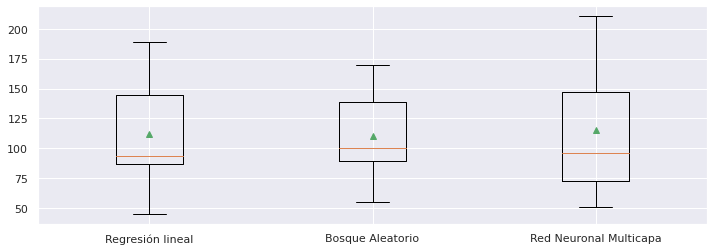

In [309]:
# Diagrama de bigotes de los tres modelos de acuerdo con los resultados de su MAPE
bpRecall = list()
for i in range(len(resultados)):
  MAPE_metric = resultados[i]['test_mape']
  bpRecall.append(MAPE_metric)

plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()


### Conclusiones
-------------------------------

# **Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los  hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación  cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 

In [312]:
# Entrenamiento de los mejores datos del modelo MLP
rango1= list(np.round(np.linspace(0.0001, 0.0015,5, endpoint=False), 4))
rango2= list(np.round(np.linspace(0.001, 0.015, 5, endpoint=False), 4))

pipe = Pipeline(steps=[
    ('ct', columnasTransformer),
    ('MLPRegressor', MLPRegressor())
])

dicc_grid = {'MLPRegressor__max_iter':[500, 12000, 12500, 13000],
             'MLPRegressor__hidden_layer_sizes':[(30,30,30), (30,20,10), (30,20)],
             'MLPRegressor__alpha': rango1,
             'MLPRegressor__learning_rate_init': rango2
             }

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

grid = GridSearchCV(pipe, 
                    dicc_grid,
                    cv=cv)

In [315]:
#Búsqueda del mejor resultado obtenido de la combinación de diferentes hiperparámetros
Xx = columnasTransformer.fit_transform(X_train)

grid.fit(Xx, np.ravel(y_train))
best_params_mlp = grid.best_params_

print('Mejor valor de f1 obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', best_params_mlp)
print('Métrica utilizada:', grid.scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4500 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/__init__.py", line 409, in _get_column_indices
    all_columns = X.columns
AttributeError: 'numpy.ndarray' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  Fil

ValueError: ignored

# **Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

In [316]:
#Configuración del modelo con la mejor combinación obtenida
best_modelo_mlp = MLPRegressor(
    max_iter = best_params_mlp['max_iter'],
    hidden_layer_sizes = best_params_mlp['hidden_layer_sizes'],
    alpha = best_params_mlp['alpha'],
    learning_rate_init = best_params_mlp['learning_rate_init'],
)

NameError: ignored

In [ ]:
# Parametros del Modelo
pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', best_modelo_mlp)])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#kfold = RepeatedKFold(n_splits=5, shuffle=True, random_state=42)

mis_metricas ={'rmsee':make_scorer(rmse),
               'mae':make_scorer(mae),
               'mape':make_scorer(mape)}


# Entrenamiento del modelo 
scores = cross_validate(pipeline, X_test, np.ravel(y_test), scoring = mis_metricas, cv=kfold)
resultados.append(scores)

print('%s:\nRMSE: %.3f\nMAE: %.3f\nMAPE: %.3f\n' % ("Red Neuronal Multicapa",
                                                      np.mean(scores['test_rmsee']),
                                                      np.mean(scores['test_mae']),
                                                      np.mean(scores['test_mape']),
                                                   ))

In [ ]:
importance = permutation_importance(best_modelo_mlp, X_test, y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

# **Ejercicio-10.**

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de  factores con este modelo con un diagrama de barras. 

In [ ]:
#Configuración de diferentes valores para los hiperparámetros del modelo.
modelo = RandomForestRegressor(n_estimators=50)

pipe = Pipeline(steps=[
    ('ct', columnasTransformer),
    ('RandomForestRegressor', modelo)
])

dicc_grid = {
            'RandomForestRegressor__n_estimators':[100, 150, 200, 250,300],
            'RandomForestRegressor__criterion':["squared_error", "poisson"] 
        }

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

grid = GridSearchCV(pipe, 
                    dicc_grid, 
                    cv=cv
                )

In [ ]:
#Búsqueda del mejor resultado obtenido de la combinación de diferentes hiperparámetros
Xx = columnasTransformer.fit_transform(X_train)

grid.fit(Xx, np.ravel(y_train))
best_params_rf =  grid.best_params_

print('Mejor valor de "recall" obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', best_params_rf)
print('Métrica utilizada:', grid.scoring)

In [ ]:
#Configuración del modelo con la mejor combinación obtenida Random Forest
best_modelo_rf = RandomForestRegressor(
                            n_estimators = best_params_rf["n_estimators"],
                            criterion= best_params_rf["criterion"],
                           )

In [ ]:
# Parametros del Modelo
pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', best_modelo_rf)])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#kfold = RepeatedKFold(n_splits=5, shuffle=True, random_state=42)

mis_metricas ={'rmsee':make_scorer(rmse),
               'mae':make_scorer(mae),
               'mape':make_scorer(mape)}


# Entrenamiento del modelo 
scores = cross_validate(pipeline, X_test, np.ravel(y_test), scoring = mis_metricas, cv=kfold)
resultados.append(scores)

print('%s:\nRMSE: %.3f\nMAE: %.3f\nMAPE: %.3f\n' % ("Bosque Aleatorio",
                                                      np.mean(scores['test_rmsee']),
                                                      np.mean(scores['test_mae']),
                                                      np.mean(scores['test_mape']),
                                                   ))

In [ ]:
importance = permutation_importance(best_modelo_rf, X_test, y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

# **Ejercicio-11.**

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras. 

In [ ]:
#Configuración de diferentes valores para los hiperparámetros del modelo.
modelo = LinearRegression(penalty='l2', max_iter=10000, random_state=0)

dicc_grid = {
              'C':[0.0001,0.01,0.1,1.0,10.,100.],
              'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
              'class_weight':['balanced']
            }

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                  )

In [ ]:
#Búsqueda del mejor resultado obtenido de la combinación de diferentes hiperparámetros
Xx = columnasTransformer.fit_transform(X_train)

grid.fit(Xx, np.ravel(y_train))
best_params_lrm = grid.best_params_

print('Mejor valor de f1 obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', best_params_lrm)
print('Métrica utilizada:', grid.scoring)

In [ ]:
#Configuración del modelo con la mejor combinación obtenida
best_modelo_lr = LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C = best_params_lrm['C'],
                            class_weight = best_params_lrm['class_weight'],
                            solver = best_params_lrm['solver'],
                            random_state=1)

In [ ]:
# Parametros del Modelo
pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', best_modelo_lr)])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#kfold = RepeatedKFold(n_splits=5, shuffle=True, random_state=42)

mis_metricas ={'rmsee':make_scorer(rmse),
               'mae':make_scorer(mae),
               'mape':make_scorer(mape)}


# Entrenamiento del modelo 
scores = cross_validate(pipeline, X_test, np.ravel(y_test), scoring = mis_metricas, cv=kfold)
resultados.append(scores)

print('%s:\nRMSE: %.3f\nMAE: %.3f\nMAPE: %.3f\n' % ("Regresión lineal",
                                                      np.mean(scores['test_rmsee']),
                                                      np.mean(scores['test_mae']),
                                                      np.mean(scores['test_mape']),
                                                   ))

In [ ]:
importance = permutation_importance(best_modelo_lr, X_test, y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

# **Ejercicio-12.**

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE. Incluye tus conclusiones finales de la actividad.

In [ ]:
None

### **Fin de la Actividad de la semana 7.**